# Tabular Playground Series

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train Data

In [50]:
train_df = pd.read_csv("train.csv")

In [51]:
train_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [52]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [53]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,300000.0,249825.145857,144476.732562,1.000000,124656.500000,249738.500000,374836.250000,499999.000000
cont1,300000.0,0.506873,0.203976,-0.082263,0.343078,0.484005,0.643789,1.016227
cont2,300000.0,0.497898,0.228159,-0.031397,0.319170,0.553209,0.731263,0.859697
cont3,300000.0,0.521557,0.200770,0.020967,0.344096,0.551471,0.648315,1.006955
cont4,300000.0,0.515683,0.233035,0.152761,0.294935,0.482880,0.748705,1.010402
cont5,300000.0,0.502022,0.220701,0.276377,0.284108,0.451733,0.670660,1.034261
cont6,300000.0,0.526515,0.217909,0.066166,0.356163,0.470988,0.694043,1.043858
cont7,300000.0,0.487890,0.181096,-0.097666,0.346600,0.466825,0.581292,1.066167
cont8,300000.0,0.525163,0.216221,0.217260,0.341486,0.483460,0.685250,1.024427
cont9,300000.0,0.459857,0.196685,-0.240604,0.330832,0.416843,0.575041,1.004114


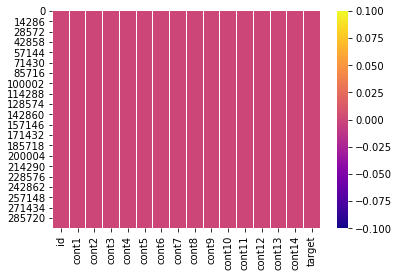

In [54]:
sns.heatmap(train_df.isnull(),cmap="plasma")

In [55]:
sum(train_df.isnull().any(axis=1))

0

In [56]:
train_df.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target'],
      dtype='object')

## Test Data

In [57]:
test_df = pd.read_csv("test.csv")

In [58]:
test_df.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275


In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [60]:
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,200000.0,250261.031215,144128.894365,0.000000,125538.250000,250389.500000,375240.250000,499990.000000
cont1,200000.0,0.507222,0.204220,-0.061638,0.343649,0.484292,0.644079,1.017577
cont2,200000.0,0.498080,0.227866,-0.030548,0.322703,0.553147,0.686518,0.853813
cont3,200000.0,0.521381,0.200656,0.040867,0.344251,0.551413,0.648656,1.001791
cont4,200000.0,0.514801,0.232995,0.153318,0.294361,0.482019,0.747133,0.997446
cont5,200000.0,0.502274,0.220812,0.276679,0.284113,0.451960,0.670831,1.033722
cont6,200000.0,0.526987,0.218145,0.075104,0.356357,0.471000,0.694422,1.046715
cont7,200000.0,0.487722,0.180805,-0.024760,0.347336,0.466392,0.580666,1.054225
cont8,200000.0,0.525284,0.216084,0.219631,0.342148,0.483781,0.685070,1.026280
cont9,200000.0,0.460257,0.197217,-0.231308,0.330739,0.416900,0.575248,1.001405


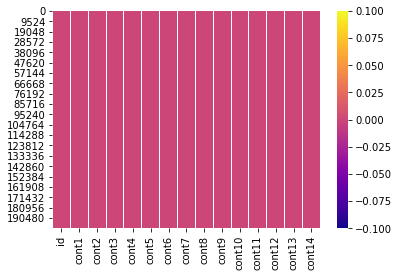

In [61]:
sns.heatmap(test_df.isnull(),cmap="plasma")

In [62]:
sum(test_df.isnull().any(axis=1))

0

In [63]:
test_df.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [64]:
features = ['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14']
target = 'target'

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
logmodel = LinearRegression(fit_intercept=True,
    normalize=False)

In [67]:
logmodel.fit(train_df[features],train_df[target])

LinearRegression()

In [68]:
predictions = logmodel.predict(test_df[features])

In [69]:
predictions

array([8.05224858, 7.5958417 , 7.94937962, ..., 7.85741793, 7.93896736,
       7.95731192])

In [70]:
final_predictions = pd.DataFrame({'id':test_df['id'],'target':predictions})

In [71]:
final_predictions.head()

,id,target
0,0,8.052249
1,2,7.595842
2,6,7.949380
3,7,7.940673
4,10,8.059343


In [72]:
final_predictions.tail()

,id,target
199995,499984,7.940747
199996,499985,7.976889
199997,499987,7.857418
199998,499988,7.938967
199999,499990,7.957312


In [73]:
filename = 'Tabular_Playground_Series_Submissions.csv'

final_predictions.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Tabular_Playground_Series_Submissions.csv
